In [1]:
import pandas as pd
df = pd.read_csv("Google Scholar AI&ML Papers.csv")

In [2]:
df.columns

Index(['Title', 'Abstract', 'Authors', 'Year', 'URL', 'Citations', 'Journal',
       'Venue', 'Publication Types'],
      dtype='object')

In [3]:
df.head()

Title  \
0  Fashion-MNIST: a Novel Image Dataset for Bench...   
1  TensorFlow: Large-Scale Machine Learning on He...   
2  Stop explaining black box machine learning mod...   
3                An Introduction to Machine Learning   
4  Convolutional LSTM Network: A Machine Learning...   

                                            Abstract  \
0  We present Fashion-MNIST, a new dataset compri...   
1  TensorFlow is an interface for expressing mach...   
2                                                NaN   
3                                                NaN   
4  The goal of precipitation nowcasting is to pre...   

                                             Authors  Year  \
0            Han Xiao, Kashif Rasul, Roland Vollgraf  2017   
1  Martín Abadi, Ashish Agarwal, P. Barham, E. Br...  2016   
2                                           C. Rudin  2018   
3                                           M. Kubát  2017   
4  Xingjian Shi, Zhourong Chen, Hao Wang, D. Yeun...  2015   

                                                 URL  Citations  \
0  https://www.semanticscholar.org/paper/f9c602cc...       8315   
1  https://www.semanticscholar.org/paper/9c9d7247...      10959   
2  https://www.semanticscholar.org/paper/bc00ff34...       5570   
3  https://www.semanticscholar.org/paper/794b3ffd...       4076   
4  https://www.semanticscholar.org/paper/f9c990b1...       7578   

                       Journal                                  Venue  \
0                        ArXiv                              arXiv.org   
1                        ArXiv                              arXiv.org   
2  Nature Machine Intelligence            Nature Machine Intelligence   
3                          NaN    Cambridge International Law Journal   
4                          NaN  Neural Information Processing Systems   

            Publication Types  
0              JournalArticle  
1              JournalArticle  
2              JournalArticle  
3                         NaN  
4  JournalArticle, Conference

In [4]:
# Determine the best text column to use
text_column = "Abstract" if "Abstract" in df.columns else "Title"
text_column

'Abstract'

In [5]:
# Drop rows with missing values in text column and remove duplicates

df = df.dropna(subset=[text_column])
df = df.drop_duplicates()

In [6]:
import re

# Preprocess text
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.strip()  # Remove extra spaces
    return text

# Apply preprocessing
df[text_column] = df[text_column].fillna("").apply(clean_text)



In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
[nltk_data] Downloading package punkt to /home/jxchenlu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jxchenlu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/jxchenlu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Function for text preprocessing
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.strip()  # Remove extra spaces
    return text

# Handle missing values
df[text_column] = df[text_column].fillna("").apply(preprocess_text)  # Fill NaN & clean text

def preprocess_text_abstract(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

abstract_lists = []
for abstract in df['Abstract']:
    abstract_lists.append(preprocess_text_abstract(abstract))

In [9]:
abstract_lists

[['present',
  'fashionmnist',
  'new',
  'dataset',
  'comprising',
  'x',
  'grayscale',
  'images',
  'fashion',
  'products',
  'categories',
  'images',
  'per',
  'category',
  'training',
  'set',
  'images',
  'test',
  'set',
  'images',
  'fashionmnist',
  'intended',
  'serve',
  'direct',
  'dropin',
  'replacement',
  'original',
  'mnist',
  'dataset',
  'benchmarking',
  'machine',
  'learning',
  'algorithms',
  'shares',
  'image',
  'size',
  'data',
  'format',
  'structure',
  'training',
  'testing',
  'splits',
  'dataset',
  'freely',
  'available',
  'https',
  'url'],
 ['tensorflow',
  'interface',
  'expressing',
  'machine',
  'learning',
  'algorithms',
  'implementation',
  'executing',
  'algorithms',
  'computation',
  'expressed',
  'using',
  'tensorflow',
  'executed',
  'little',
  'change',
  'wide',
  'variety',
  'heterogeneous',
  'systems',
  'ranging',
  'mobile',
  'devices',
  'phones',
  'tablets',
  'largescale',
  'distributed',
  'systems'

In [10]:
len(abstract_lists)

5249

In [11]:
# WORD2VEC

model = Word2Vec(sentences=abstract_lists, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Save the model for future use
model.save("word2vec.model")

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Reduce dimensionality of word vectors for visualization
word_vectors = model.wv[model.wv.index_to_key]  # Get the word vectors
pca = PCA(n_components=2)  # Initialize PCA
reduced_embeddings = pca.fit_transform(word_vectors)  # Fit and transform the word vectors

In [13]:
reduced_embeddings.shape

(28942, 2)

In [14]:
!pip install kneed


In [16]:
import sklearn 
print(sklearn.__version__)

1.1.3


In [16]:
reduced_embeddings

array([[ 1.3166763 , -0.05058501],
       [ 1.1359317 ,  0.41191536],
       [ 1.1130317 , -0.07890443],
       ...,
       [-0.41986492, -0.06754705],
       [-0.35286528, -0.04903611],
       [-0.56977254,  0.02746595]], dtype=float32)

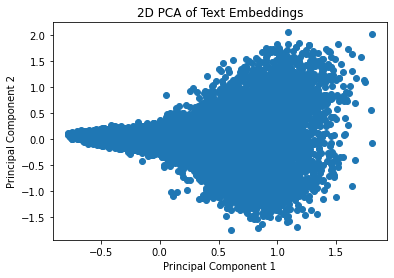

In [17]:
import matplotlib.pyplot as plt

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title("2D PCA of Text Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

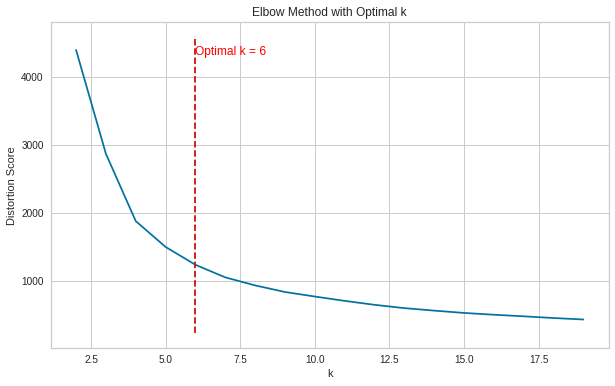

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.sparse import issparse
from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer


# Test 1: Elbow Method with Distortion Score
distortions = []
K = range(2, 20)  # Testing k from 2 to 20
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_embeddings)
    distortions.append(kmeans.inertia_)

# Find the elbow point automatically
kn = KneeLocator(K, distortions, curve='convex', direction='decreasing')
elbow_k = kn.elbow if kn.elbow else K[0]  # Handle case where no elbow is found

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.vlines(elbow_k, plt.ylim()[0], plt.ylim()[1], colors='r', linestyles='dashed')
plt.xlabel('k')
plt.ylabel('Distortion Score')
plt.title('Elbow Method with Optimal k')
plt.text(elbow_k, plt.ylim()[1] * 0.9, f'Optimal k = {elbow_k}', color='red')
plt.show()

# Test 2: Silhouette Analysis
silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_embeddings)
    silhouette_avg = silhouette_score(reduced_embeddings, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the k with the highest silhouette score
best_k_silhouette = K[np.argmax(silhouette_scores)]

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.vlines(best_k_silhouette, plt.ylim()[0], plt.ylim()[1], colors='r', linestyles='dashed')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.text(best_k_silhouette, plt.ylim()[1] * 0.9, f'Best k = {best_k_silhouette}', color='red')
plt.show()

# Test 3: Elbow Visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 20), metric='distortion')
visualizer.fit(reduced_embeddings)
visualizer.show()

# Extract optimal k values
optimal_k = visualizer.elbow_value_ if visualizer.elbow_value_ else elbow_k  # Fallback to elbow method

print(f"Recommended number of clusters:")
print(f"1. Elbow Method: {elbow_k}")
print(f"2. Silhouette Analysis: {best_k_silhouette}")
print(f"3. Elbow Visualizer: {optimal_k}")


Best BIRCH threshold (highest Silhouette Score): 0.30000000000000004


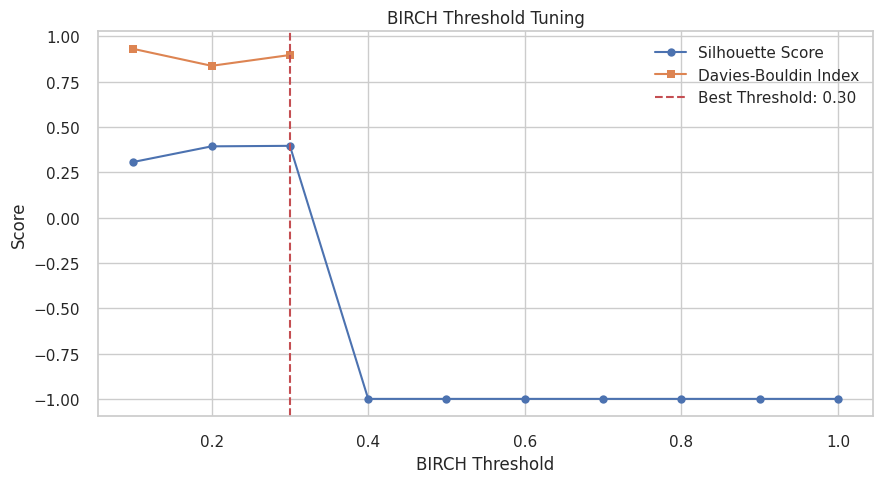

In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import davies_bouldin_score

# Define a range of thresholds to test
thresholds = np.linspace(0.1, 1.0, 10)  # Test 10 threshold values

# Store evaluation metrics
silhouette_scores = []
davies_bouldin_scores = []

# Evaluate BIRCH for different thresholds
for thresh in thresholds:
    birch = Birch(threshold=thresh, n_clusters=None)
    labels = birch.fit_predict(reduced_embeddings)

    # Ensure multiple clusters exist before evaluating
    if len(set(labels)) > 1:
        silhouette_scores.append(silhouette_score(reduced_embeddings, labels))
        davies_bouldin_scores.append(davies_bouldin_score(reduced_embeddings, labels))
    else:
        silhouette_scores.append(-1)  # Invalid clustering
        davies_bouldin_scores.append(np.inf)  # Invalid clustering

# Find the best threshold
best_threshold = thresholds[np.argmax(silhouette_scores)]
print(f"Best BIRCH threshold (highest Silhouette Score): {best_threshold}")

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(thresholds, silhouette_scores, marker='o', label="Silhouette Score")
plt.plot(thresholds, davies_bouldin_scores, marker='s', label="Davies-Bouldin Index")
plt.axvline(x=best_threshold, color='r', linestyle="--", label=f"Best Threshold: {best_threshold:.2f}")
plt.xlabel("BIRCH Threshold")
plt.ylabel("Score")
plt.title("BIRCH Threshold Tuning")
plt.legend()
plt.show()



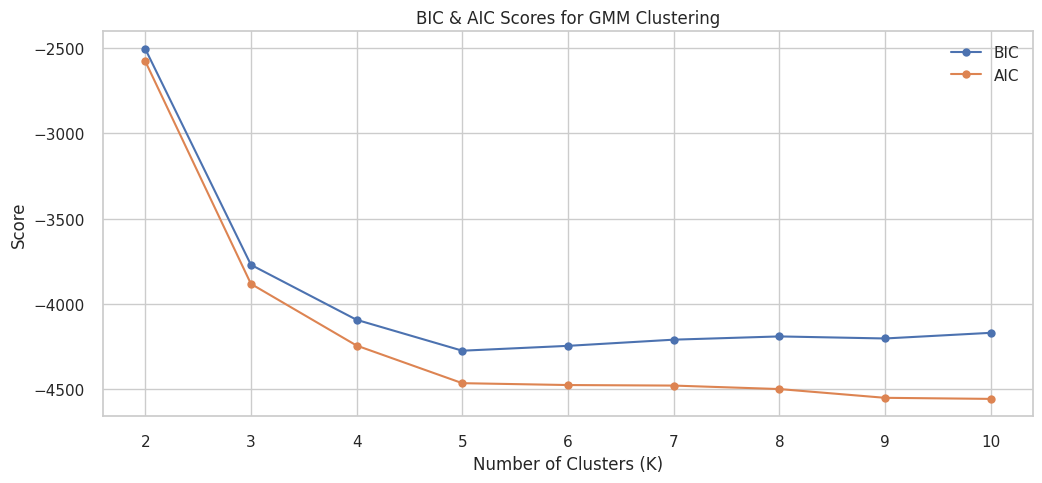

Optimal number of clusters based on BIC: 5


In [ ]:
from sklearn.mixture import GaussianMixture


# Function to find the optimal number of clusters for GMM
def find_best_gmm_clusters(reduced_embeddings, max_clusters=10):
    bic_scores = []
    aic_scores = []
    cluster_range = range(2, max_clusters + 1)

    for k in cluster_range:
        gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
        gmm.fit(reduced_embeddings)

        bic_scores.append(gmm.bic(reduced_embeddings))
        aic_scores.append(gmm.aic(reduced_embeddings))


    return cluster_range, bic_scores, aic_scores, silhouette_scores

# Run the function on embeddings
cluster_range, bic_scores, aic_scores, silhouette_scores = find_best_gmm_clusters(reduced_embeddings, max_clusters=10)

# Plot BIC & AIC
plt.figure(figsize=(12, 5))
plt.plot(cluster_range, bic_scores, label="BIC", marker="o")
plt.plot(cluster_range, aic_scores, label="AIC", marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Score")
plt.legend()
plt.title("BIC & AIC Scores for GMM Clustering")
plt.show()

# Print Best K
best_k = cluster_range[np.argmin(bic_scores)]  # Based on minimum BIC
print(f"Optimal number of clusters based on BIC: {best_k}")


In [ ]:
from sklearn.cluster import SpectralClustering, DBSCAN

# Clustering Algorithms
clustering_algorithms = {
    "K-Means++": KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10),
    "Spectral Clustering": SpectralClustering(n_clusters=optimal_k, affinity='rbf', random_state=42),
    "BIRCH": Birch(n_clusters=optimal_k, threshold=best_threshold),
    "Gaussian Mixture Model": GaussianMixture(n_components=best_k, random_state=42),
}



In [ ]:
# Compute Clustering Results
cluster_results = {}
validation_scores = {}

# Fit each clustering model and store results
for name, algorithm in clustering_algorithms.items():
    # Fit sklearn-compatible models with original features
    labels = algorithm.fit_predict(reduced_embeddings)
    cluster_results[name] = labels  # Store cluster labels

# Now iterate over cluster_results (which is no longer empty)
for name, labels in cluster_results.items():
    unique_labels = set(labels)
    print(f"{name} - Unique Clusters Found: {len(unique_labels)}")


K-Means++ - Unique Clusters Found: 5
Spectral Clustering - Unique Clusters Found: 5
BIRCH - Unique Clusters Found: 5
Gaussian Mixture Model - Unique Clusters Found: 5


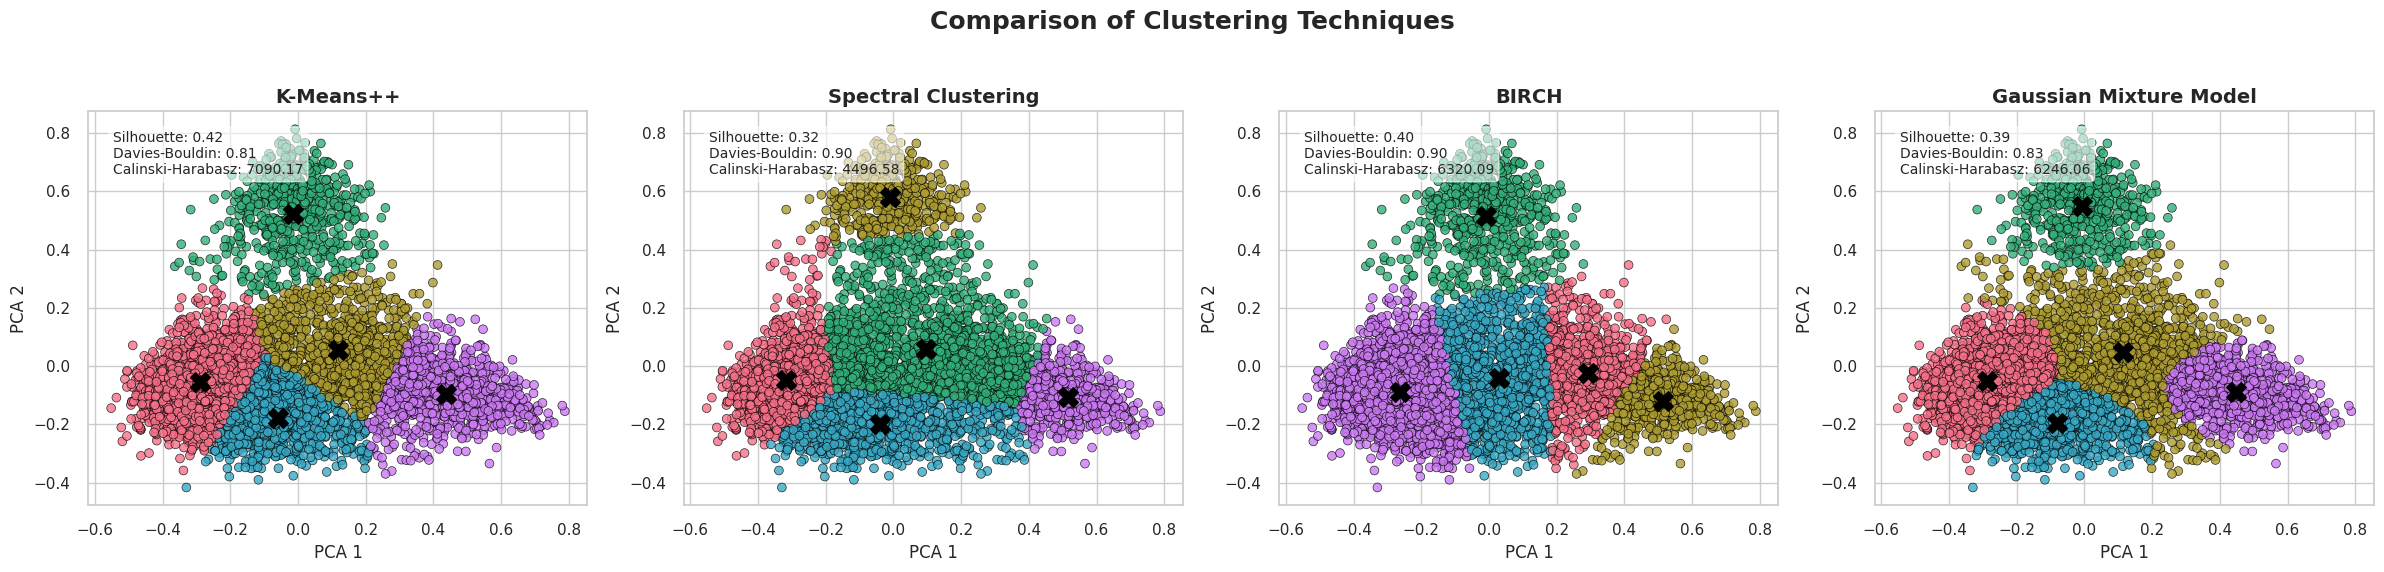

In [ ]:
import seaborn as sns
from sklearn.metrics import  calinski_harabasz_score

# Set seaborn style for better visualization
sns.set(style="whitegrid")

# Store validation scores in a dictionary
validation_scores = {}

for name, labels in cluster_results.items():
    data = reduced_embeddings

    # Compute clustering validation metrics only if there is more than one cluster
    if len(set(labels)) > 1:
        silhouette = silhouette_score(data, labels)
    else:
        silhouette = -1  # Assign -1 when only one cluster exists to avoid errors

    # Compute Davies-Bouldin Index (lower is better)
    db_index = davies_bouldin_score(data, labels)

    # Compute Calinski-Harabasz Index (higher is better)
    ch_index = calinski_harabasz_score(data, labels)

    # Store validation scores
    validation_scores[name] = {
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index,
        "Calinski-Harabasz Index": ch_index
    }

# Get the number of clustering methods used
num_clusters = len(cluster_results)

# Create subplots with 1 row and num_clusters columns
fig, axes = plt.subplots(1, num_clusters, figsize=(6 * num_clusters, 6))
fig.suptitle("Comparison of Clustering Techniques", fontsize=18, fontweight="bold")

# If only one clustering method exists, make sure axes is a list
if num_clusters == 1:
    axes = [axes]

# Iterate through the clustering results and visualize the clusters
for i, (name, labels) in enumerate(cluster_results.items()):
    unique_labels = len(set(labels))  # Get number of unique clusters
    palette = sns.color_palette("husl", n_colors=unique_labels)  # Distinct color palette

    x = data[:, 0]  # First column (PC1)
    y = data[:, 1]  # Second column (PC2)

    # Create scatter plot for visualizing clusters
    scatter = sns.scatterplot(
        x=x,
        y=y,
        hue=labels,
        palette=palette,
        alpha=0.8,
        s=40,
        ax=axes[i],
        edgecolor="black"  # Add borders to points
    )

    # Calculate and plot centroids
    cluster_centroids = np.array([data[np.array(labels) == c].mean(axis=0) for c in set(labels)])
    axes[i].scatter(cluster_centroids[:, 0], cluster_centroids[:, 1],
                    marker="X", s=200, color="black", label="Centroids")

    # Set plot title and axis labels
    axes[i].set_title(f"{name}", fontsize=14, fontweight="bold")
    axes[i].set_xlabel("PCA 1", fontsize=12)
    axes[i].set_ylabel("PCA 2", fontsize=12)

    # Display validation scores as text on the plot
    score_text = f"Silhouette: {validation_scores[name]['Silhouette Score']:.2f}\n" \
                 f"Davies-Bouldin: {validation_scores[name]['Davies-Bouldin Index']:.2f}\n" \
                 f"Calinski-Harabasz: {validation_scores[name]['Calinski-Harabasz Index']:.2f}"
    axes[i].text(0.05, 0.95, score_text, transform=axes[i].transAxes, fontsize=10,
                 verticalalignment="top", bbox=dict(boxstyle="round", facecolor="white", alpha=0.6))

    # Remove legends to avoid redundancy
    axes[i].legend([], frameon=False)

# Adjust layout to prevent overlapping labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()


In [ ]:
# Convert validation scores to DataFrame
validation_df = pd.DataFrame(validation_scores).T

# Print the validation scores
validation_df

Silhouette Score  Davies-Bouldin Index  \
K-Means++                       0.415790              0.808784   
Spectral Clustering             0.324529              0.904555   
BIRCH                           0.395657              0.896559   
Gaussian Mixture Model          0.394508              0.833102   

                        Calinski-Harabasz Index  
K-Means++                           7090.165845  
Spectral Clustering                 4496.581381  
BIRCH                               6320.091657  
Gaussian Mixture Model              6246.057397